In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [2]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test,y_test) = cifar10.load_data()
print("x_train shape:",X_train.shape)
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_test[:5] #reshaping into 1D
y_test = y_test.reshape(-1,) #no change , simple blank
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

In [5]:
y_test= y_test.flatten()
print(y_test)

[3 8 8 ... 5 1 7]


In [6]:
y_train[:5] #reshaping into 1D
y_train = y_train.reshape(-1,) #no change , simple blank
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

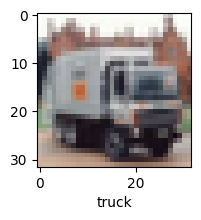

In [8]:
plot_sample(X_test,y_test,11)

In [9]:
#train data
X_train = X_train/255.0 #numpy function ka fayda
X_test = X_test/255.0 

In [10]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    #filters or layers
    ])
#categorical crossentropy is like a  vector ooutput 
#whereas sparse categorial crossentrpy is a signle value output(using this now)
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5) #accuracy is pretty low from ann..so gotta use cnn
#need to use convolutional neural netwrk and pooling layer

Epoch 1/5
1563/1563 [==============================] - 125s 79ms/step - loss: 1.8145 - accuracy: 0.3520
Epoch 2/5
1563/1563 [==============================] - 126s 81ms/step - loss: 1.6257 - accuracy: 0.4253
Epoch 3/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.5419 - accuracy: 0.4570
Epoch 4/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.4820 - accuracy: 0.4787
Epoch 5/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.4336 - accuracy: 0.4970


In [11]:
#ann report
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.41      0.50      1000
           1       0.54      0.71      0.61      1000
           2       0.33      0.46      0.38      1000
           3       0.39      0.28      0.32      1000
           4       0.37      0.47      0.41      1000
           5       0.40      0.40      0.40      1000
           6       0.49      0.58      0.53      1000
           7       0.71      0.38      0.50      1000
           8       0.51      0.73      0.60      1000
           9       0.65      0.36      0.46      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
cnn.fit(X_train,y_train,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 37s 23ms/step - loss: 1.4548 - accuracy: 0.4787
Epoch 2/3
1563/1563 [==============================] - 32s 21ms/step - loss: 1.1061 - accuracy: 0.6117
Epoch 3/3
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9877 - accuracy: 0.6570


In [15]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0041 - accuracy: 0.6570


[1.0040528774261475, 0.6570000052452087]

In [16]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[9.4362609e-03, 1.0637896e-04, 7.0126709e-03, 5.5158901e-01,
        2.2878333e-03, 1.7978625e-01, 4.6872545e-02, 3.8088395e-04,
        1.9510505e-01, 7.4230288e-03],
       [1.0276264e-01, 1.0350769e-01, 2.9134980e-04, 1.6742950e-05,
        4.8340855e-05, 1.2014557e-06, 2.5387076e-06, 3.2800785e-06,
        7.9112881e-01, 2.2374031e-03],
       [2.1948725e-02, 1.8707187e-01, 3.6087574e-03, 7.8200391e-03,
        1.4225006e-03, 1.0964357e-03, 3.5980131e-04, 1.9112678e-03,
        7.1068889e-01, 6.4071618e-02],
       [5.2730995e-01, 4.1502509e-02, 4.7446456e-02, 1.4676435e-03,
        4.6931570e-03, 2.3145954e-05, 1.1582490e-03, 3.2740919e-04,
        3.6922303e-01, 6.8485383e-03],
       [6.4549611e-05, 1.6544189e-04, 1.1816149e-02, 1.4436549e-01,
        2.5833184e-01, 3.4408908e-02, 5.4973572e-01, 1.5471864e-04,
        8.6967880e-04, 8.7472486e-05]], dtype=float32)

In [17]:
y_classes = [np.argmax(ele) for ele in y_pred]
y_classes[:5]


[3, 8, 8, 0, 6]

In [18]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

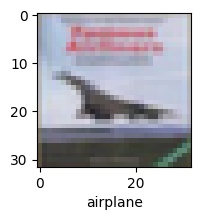

In [19]:
plot_sample(X_test,y_test,3)

In [20]:
classes[y_test[3]]

'airplane'

In [21]:
print("classification_report: \n",classification_report(y_test,y_classes))

classification_report: 
               precision    recall  f1-score   support

           0       0.67      0.73      0.70      1000
           1       0.78      0.75      0.77      1000
           2       0.67      0.41      0.51      1000
           3       0.46      0.55      0.50      1000
           4       0.71      0.47      0.57      1000
           5       0.53      0.60      0.56      1000
           6       0.70      0.78      0.74      1000
           7       0.72      0.69      0.71      1000
           8       0.76      0.77      0.76      1000
           9       0.64      0.82      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000

